# Projet Recherche Bio-Médicale

## Janvier 2021

In [ ]:
require(Rfast)
require(limma)
require(preprocessCore)
require(multtest)
require(LBE)
require(glmnet)
require(neuralnet)
require(caret)
require(survival)
require(survminer)
require(survRM2)
library(dplyr)
require(RVAideMemoire) ;

# Partie 1 ; contrôle qualité et analyse descriptive

In [ ]:
x <- read.table("genomicMatrice.csv")
y <- read.table("cliniqueMatrice.csv", header = TRUE)
x <- as.matrix(x)
y$reponse <- as.factor(y$reponse)

In [145]:
x
y

,X01005,X01010,X03002,X04006,X04007,X04008,X04010,X04016,X06002,X08001,...,X37001,X43006,X43015,X44001,X49004,X56007,X64005,X65003,X83001,LAL4
G_1,6.909379,6.771526,6.434213,6.574624,6.668878,6.622448,6.573652,6.659663,7.016926,6.776696,...,8.285340,7.890910,8.115057,8.116990,7.932815,7.754535,8.062726,8.255650,8.047779,8.348396
G_2,5.951887,6.213777,5.644286,5.560303,5.831963,5.802110,6.464053,5.853310,5.853701,5.812782,...,7.276431,6.785902,7.089230,7.400941,6.663092,7.121470,7.240777,6.778355,6.553040,7.105143
G_3,6.885977,6.232436,6.394544,6.419648,6.881741,6.818263,6.591845,6.647115,7.333252,7.135449,...,8.858767,7.977400,8.546120,7.807586,8.486160,8.526816,8.592844,8.255904,8.788063,8.281581
G_4,5.932481,6.388533,5.863738,6.691292,6.240294,6.251734,5.415904,6.125425,5.940340,5.835491,...,6.964239,6.739459,6.579187,6.590624,7.012481,6.862085,7.383876,6.479390,6.775172,6.798376
G_5,3.928768,3.632077,3.466031,3.615100,4.654348,3.580765,3.539959,4.805674,3.822736,3.631275,...,4.839486,4.951058,5.074667,4.923668,5.581034,5.063725,4.805330,4.633010,4.930499,5.000168
G_6,5.794723,5.840486,5.972802,5.910421,5.391517,5.745071,5.748834,5.707070,5.686343,5.717464,...,7.169435,7.040150,6.709200,7.132619,7.104509,7.035198,7.277751,7.514086,7.003729,7.330260
G_7,6.434992,5.863110,5.927447,6.653235,6.593693,6.444098,6.213337,6.221073,6.468257,6.064582,...,7.579429,7.491768,7.024131,6.803681,7.622772,7.826549,6.869639,7.287787,7.035581,6.599176
G_8,5.413779,6.128060,5.357013,5.396314,5.760837,6.053060,6.051574,5.588019,5.148574,5.858149,...,7.149056,6.676631,6.408681,6.154378,6.327493,6.617959,6.520927,6.513312,6.914343,6.607784
G_9,6.214431,6.178871,5.846756,6.103458,6.170112,6.437951,6.398348,6.325036,6.039133,6.190591,...,7.580824,7.579763,7.576209,7.431834,7.163387,7.479905,7.417560,7.715742,7.582872,7.594636
G_10,4.907086,4.880313,5.231201,4.771593,5.350816,5.375022,5.109522,5.275209,4.865912,5.385965,...,6.716459,7.771487,6.680567,6.964905,6.941545,7.187613,7.481186,6.805377,6.544656,7.178198


id,sex,age,cyto.normal,kinet,delai,etat,stade,biol,batch,reponse
<chr>,<chr>,<int>,<lgl>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>
1005,M,53,FALSE,dyploid,1.0951403,1,0,14.5,1,1
1010,M,19,FALSE,dyploid,12.3203285,0,0,1.1,1,0
3002,F,52,NA,dyploid,2.7707050,1,1,1.4,1,1
4006,M,38,FALSE,dyploid,5.2703628,1,0,1.8,1,1
4007,M,57,FALSE,dyploid,4.1177276,0,0,3.4,1,0
4008,M,17,FALSE,hyperd.,6.8528405,1,0,0.8,1,0
4010,F,18,FALSE,hyperd.,5.0157426,0,0,1.0,1,0
4016,M,16,FALSE,dyploid,6.7515400,1,0,0.3,1,0
6002,M,15,TRUE,dyploid,6.5708419,1,0,3.2,1,0


### Question 1

###### La matrice génomique est composée de valeurs numériques représentant les intensités lumineuses fluorescentes mesurées par rapport à une séquence observée. Ces intensités vont de 2.72 (min) à 15,57 (max), la moyenne des valeurs observées est de 6,72 et la médiane est de 6,56.

###### On peut également plot rapidement les variances de chaque puce utilisées pour savoir si un pre-processing est nécessaire;

[1] 2.859146

[1] 4.033396

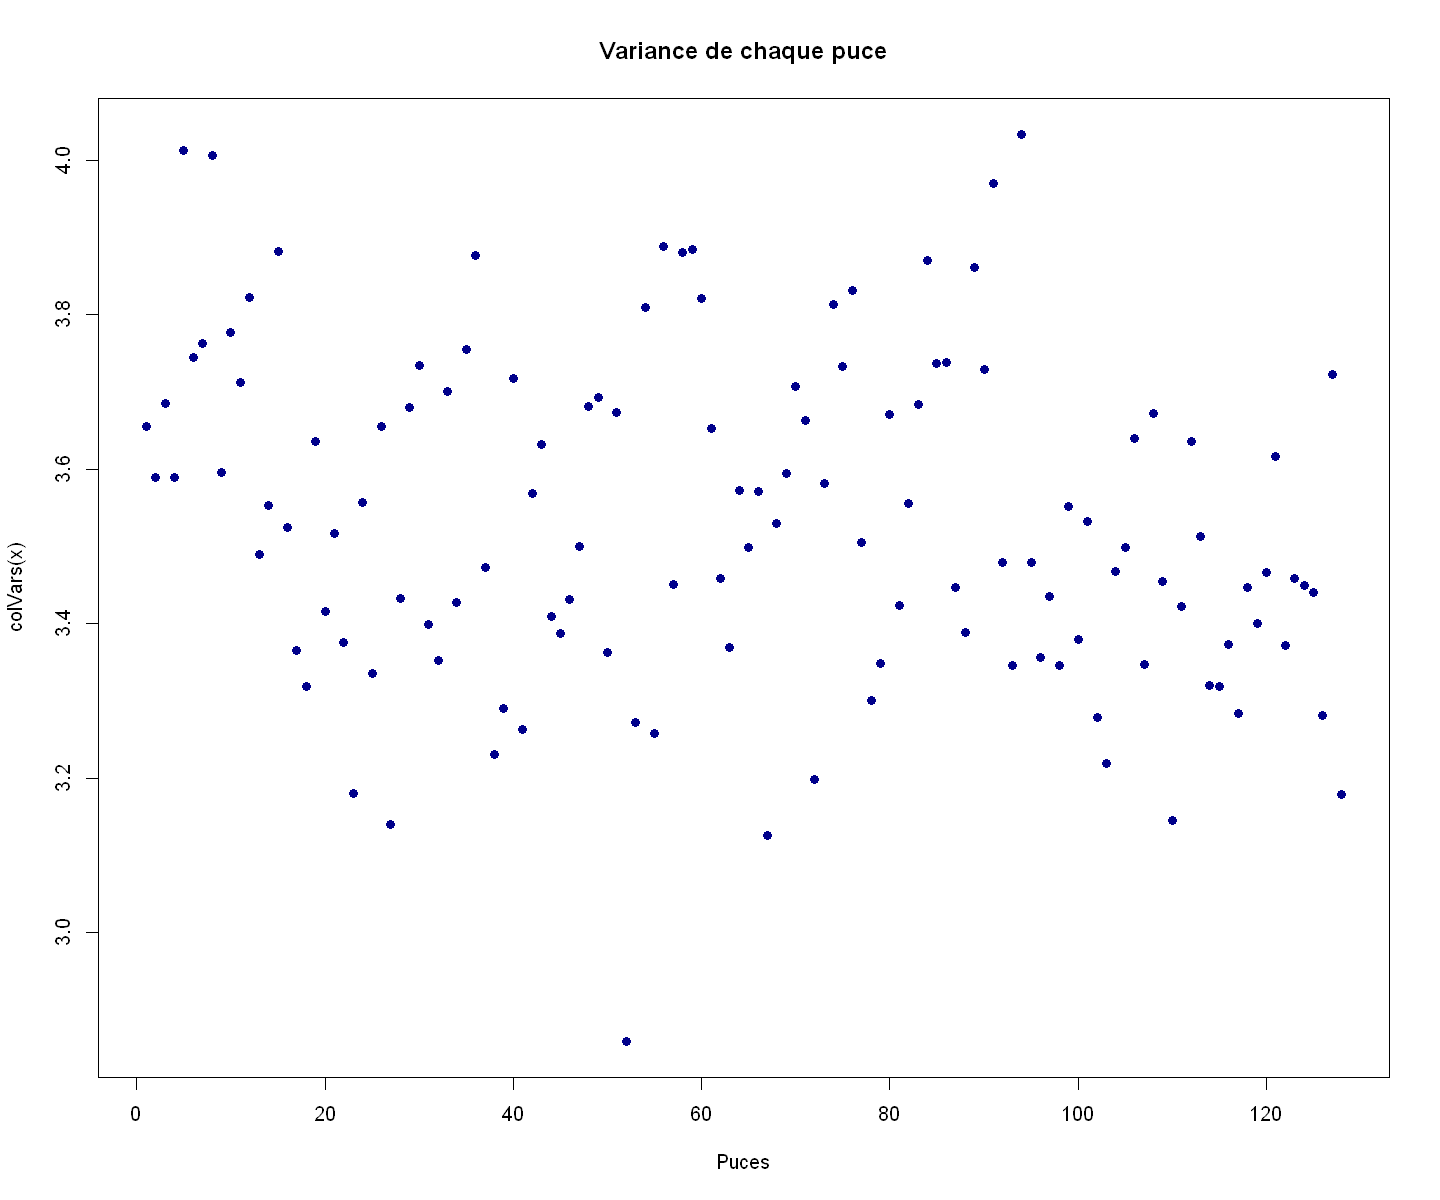

In [151]:
plot(colVars(x), col='darkblue', xlab = "Puces",
     main = "Variance de chaque puce", pch=20, cex=1.5)
min(colVars(x))
max(colVars(x))

###### Les variances des 128 puces vont de 2.86 jusqu'à 4.03, ce qui est extrêmement élevé. C'est symptomatique de données qui n'ont subit aucun pré-traitement.

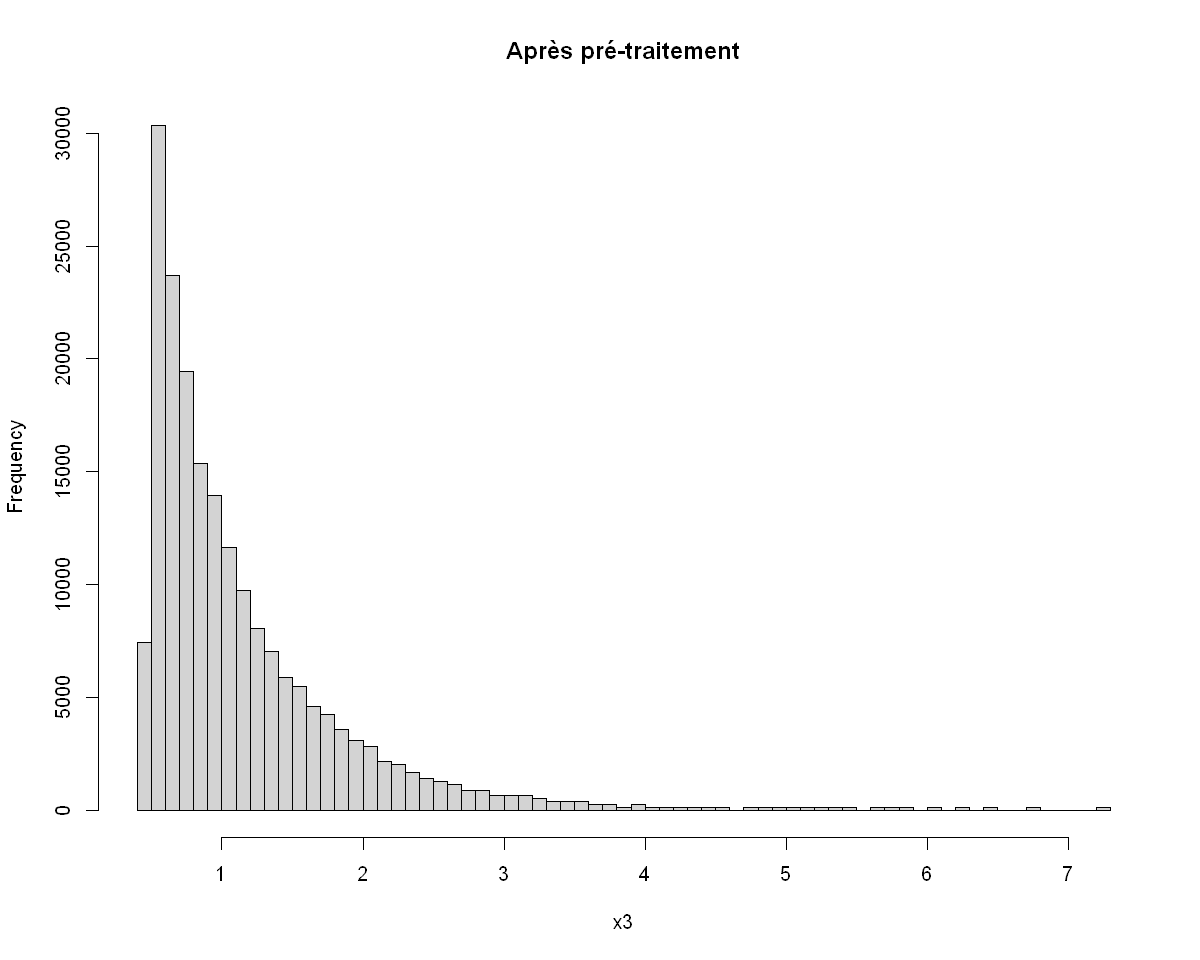

In [30]:
x2 <- normalizeQuantiles(x)
x3 <- backgroundCorrect.matrix(x2, verbose = FALSE)
hist(x3, breaks = 50, main = "Après pré-traitement")

##### La distribution est proche des standards qualités, les intensités vont maintenant de 0.60 (min) à 7,24 (max)
##### Avoir traité l'effet batch et avoir fait normalisation des quantiles est suffisant

In [ ]:
colnames(x3) <- colnames(x)
rownames(x3) <- rownames(x)
x3 <- as.data.frame(x3)
p_values <- mt.maxT(x3 , y$reponse , test = "t.equalvar", side="abs", B=100000) ;

###### La documentation de la fonction indique clairement que B (le nb de permutations) est par défaut setup à 10000, mais ce nombre doit être beaucoup plus élevé dans le cas de données microarray aussi massives. On va setup B = 100 000 et laisser tourner un moment, mais il faudrait en réalité un nombre de permutations trop élevés ici, 100 000 permettra d'être suffisamment précis.

In [35]:
pvalues_bonf <- mt.rawp2adjp(p_values$rawp[order(p_values$index)],
                             proc="Bonferroni")
pvalues_bonf[["adjp"]][which(pvalues_bonf$index == 14),]

rawp Bonferroni 
   0.00005    0.07625

### Question 2

In [37]:
#FWER 5% (alpha par défaut à 0.05) Bonferroni et Holm

pvalues_bonf_holm <- mt.rawp2adjp(p_values$rawp[order(p_values$index)],
                                  proc=c("Bonferroni","Holm"))
bonf_holm <- as.data.frame(pvalues_bonf_holm$adjp)
sum(bonf_holm$Bonferroni<=0.05)
sum(bonf_holm$Holm<=0.05)

[1] 13

[1] 13

##### Les procédures Bonferroni et Holm retiennent 13 transcrits tous les deux.

In [38]:
pvalues_BH_BY <- mt.rawp2adjp(p_values$rawp[order(p_values$index)],
                             proc=c("BH","BY"))
index <- pvalues_BH_BY$index
BH_BY <- as.data.frame(pvalues_BH_BY$adjp)
BH_BY <- cbind(BH_BY,index)
sum(BH_BY$BH<=0.05)
sum(BH_BY$BY<=0.05)

[1] 73

[1] 23

##### Benjamin Hochberg  : 73 transcrits retenus (alpha 5%)
##### Benjamin Yekutieli : 23 transcrits retenus (alpha 5%)

In [ ]:
#Les statistiques de test marginales sont comparées à un seuil local alpha fixe
#(car bonferroni est une procédure en une étape), transformé qui permettra
#un contrôle du FWER, souvent à 5%.

#Holm contrôle également le FWER au sens fort, sous conditions (indépendance,
#dépendance positive), mais avec une procédure séquentielle plus complexe.

#Le contrôle du FWER au sens fort a pour objectif de n'avoir aucun faux positif
#avec une certitude de 1 - (seuil désiré). Ce qui fait les procédures de
#Bonferroni et Holm, différemment.

#Holm a cependant "l'avantage" de contrôler vraiment le FWER à 5%.
#Avec bonferroni, on se pénalise un peu plus et le contrôle peut être encore
#plus strict que le seuil désiré


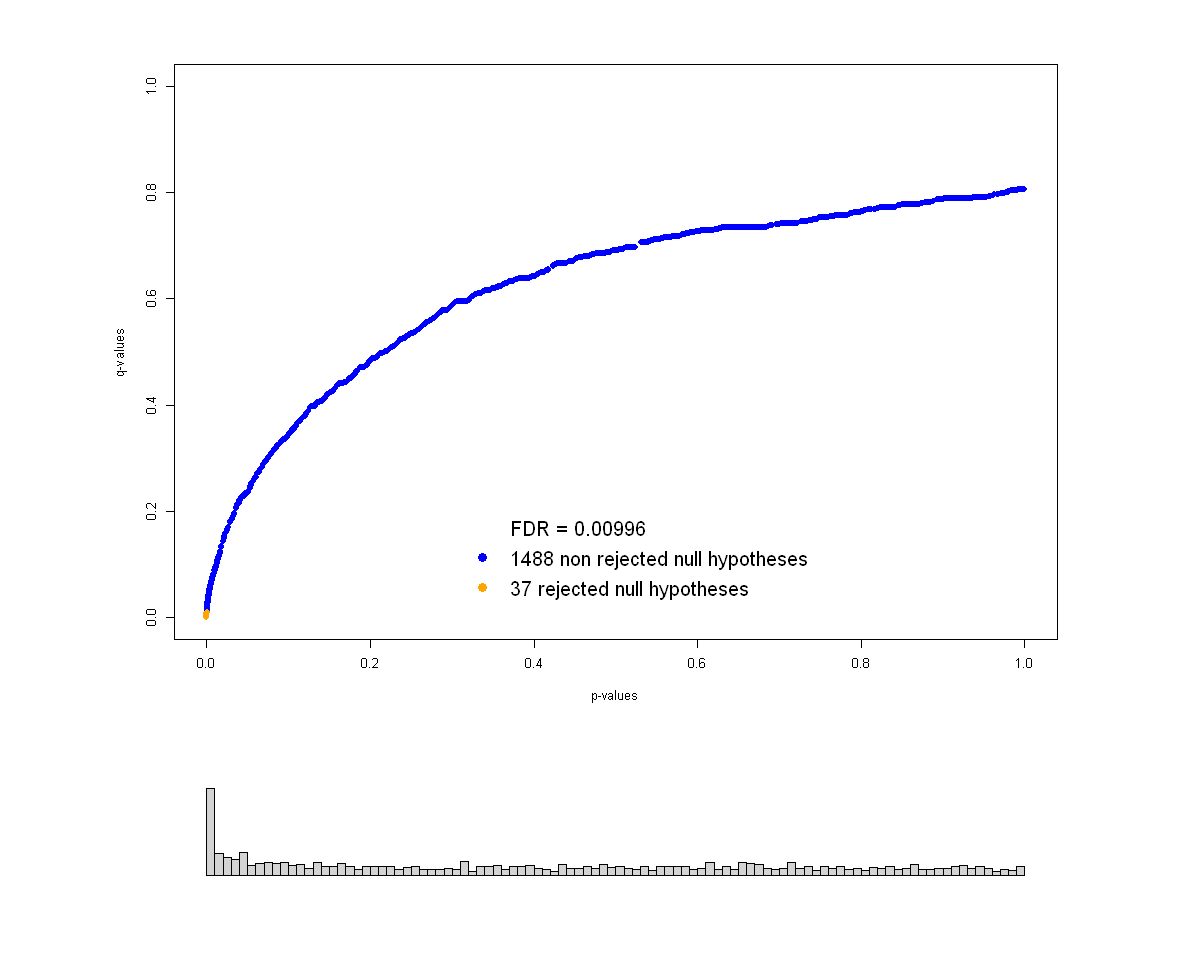

In [40]:
Graph_LBE <- LBE(pval = p_values$rawp, FDR.level = 0.01)

##### 37 transcrits sont sélectionnés au seuil très strict p(FDR) 1 % (87 si on test 5%)

In [ ]:
#Le p(FDR) est un critère inductif non contrôlable, c'est l'espérance du taux de faux positifs conditionnellement au fait 
#d'avoir au moins un positif.

#On l'estime de façon empirique avec une estimation bayésienne, à partir de la configuration actuelle observée, 
#partiellement inconnue.

#A l'inverse d'avant, ici on probabilise l'hypothèse nulle H0.

### Question 3

In [44]:
#Dans notre cas, le critère (p)FDR est mieux adapté.

#Le FWER est idéal dans une étude décisionnelle, où une fausse conclusion peut
#avoir de lourdes conséquences à la fois humaines et financières.
#Idéal pour l'obtention d'une AMM.
#Mais ici ça n'a pas de sens de se brider avec un critère aussi sélectif.

#Dans une situation exploratoire, il est plus intéressant d'avoir plus
#de gènes sélectionnés à explorer, la décision finale n'étant pas totalement
#remise en cause par une conclusion erronée.
#Puisque potentiellement, dans une autre étude, les marqueurs pourront être
#repris et retestés.

#Avoir des transcrits sélectifs à 1% sur le FDR est plus intéressant que
#Bonferroni et ses 5% FWER. On peut faire des erreurs en exploratoire, donc le
#FWER n'est pas à retenir.

#L'exploratoire n'ayant pas vocation à fournir des conclusions sûres à 100%,
#le p(FDR) est mieux adapté.

# Partie 2, Machine Learning pour la prédiction

### Pour chacun des modèles, on fera une 4-fold cross-validation et on observera le taux de mal classés.
### Pour évaluer la variabilité des méthodes de prédictions, on effectuera 100 itérations de cette ’4-fold cross-validation’ plus loin et on donnera la moyenne et l’écart-type obtenus pour chaque procédure.

### Question 4

##### Réduction des dimensions pour les régressions + création matrice transposée

In [45]:
x3_transpose <- t(x3)
dix_genes_index <- p_values$index[1:10]
dix_genes <- x3_transpose[,dix_genes_index]
y$reponse <- as.factor(y$reponse)

#### Regression logistique 

In [51]:
RL <- train(x=dix_genes, y=y$reponse,trControl = trainControl("cv", number = 4),
      method = "glm",
      family=binomial())

erreur_RL <- 1-RL[["results"]][["Accuracy"]]
cat("Pour la régression logistique, ", (erreur_RL*100), '% de mal classés')

Pour la régression logistique,  21.95366 % de mal classés

#### Régression ridge

In [56]:
ridge <- cv.glmnet(dix_genes,y$reponse,type.measure = 'class',
          standardize = FALSE, family = "binomial", alpha = 0,nfolds = 4)
resultats_ridge <- print.cv.glmnet(ridge)
erreur_ridge <- min(resultats_ridge$Measure)
cat("
Pour la régression ridge, ", (erreur_ridge*100), '% de mal classés')

#L'erreur qu'on va extraire à chaque fois pour plus tard, c'est l'erreur avec le
#lambda min affiché ci-dessus, pour être le plus optimiste possible envers
#la régression ridge.


Call:  cv.glmnet(x = dix_genes, y = y$reponse, type.measure = "class",      nfolds = 4, standardize = FALSE, family = "binomial", alpha = 0) 

Measure: Misclassification Error 

    Lambda Index Measure      SE Nonzero
min 0.1611    80  0.1953 0.03465      10
1se 0.4085    70  0.2266 0.04666      10

Pour la régression ridge,  19.53125 % de mal classés

#### Régression lasso

In [58]:
lasso <- cv.glmnet(dix_genes,y$reponse,type.measure = 'class'
                 ,standardize = FALSE ,family = "binomial",alpha = 1,nfolds = 4)
resultats_lasso <- print.cv.glmnet(lasso)
erreur_lasso <- min(resultats_lasso$Measure)
cat("
Pour la régression lasso, ", (erreur_lasso*100), '% de mal classés')

#Même raisonnement pour alpha = 1 (régression lasso)


Call:  cv.glmnet(x = dix_genes, y = y$reponse, type.measure = "class",      nfolds = 4, standardize = FALSE, family = "binomial", alpha = 1) 

Measure: Misclassification Error 

       Lambda Index Measure      SE Nonzero
min 0.0000840    87  0.1875 0.03827      10
1se 0.0006504    65  0.2188 0.03375       9

Pour la régression lasso,  18.75 % de mal classés

#### Forêts aléatoires

In [59]:
model_forets <- train(x=x3_transpose,
               y=y$reponse,
               trControl = trainControl("cv", number = 4),
               method = "rf",
               ntree = 300)

In [63]:
model_forets

Random Forest 

 128 samples
1525 predictors
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 97, 96, 96, 95 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
     2  0.6243280  0.1699733
    55  0.7650293  0.5105088
  1524  0.7489003  0.4979353

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 55.

In [ ]:
###### La précision Out of Bag donné par Caret sera notre erreur de classement.
###### Ici 24,50%

#### Analyse discriminante diagonale (linéaire et quadratique)

In [72]:
## ADD supprimée, package sparsediscrim plus comptatible avec caret

#### Neurones

In [74]:
#Réduction de dimensionnalitée imposée pour les neurones

seuil_1pourcent <- p_values[p_values[,'rawp'] < 0.01,]
seuil_1pourcent_index <- seuil_1pourcent$index
genes_neurones <- x3_transpose[,seuil_1pourcent_index]
neurones <- cbind(genes_neurones, y$reponse)
colnames(neurones)[137] <- 'y'
neurones <- as.data.frame(neurones)
neurones$y <- as.factor(neurones$y)

In [75]:
#Neuralnet n'autorisant pas l'écriture y ~., on doit stocker la formule dans une variable.
n <- names(neurones)
formule <- as.formula(paste("y ~", paste(n[!n %in% "y"], collapse = " + ")))

In [77]:
#Séparation des données 75% training / 25% validation.

train <- sample(x = nrow(neurones), size = nrow(neurones)*0.75)
neurones_train <- neurones[train,]
neurones_validation <- neurones[-train,]
train_nn <- neuralnet(formule, data=neurones_train , hidden=c(5,2),
                      linear.output = FALSE, lifesign = "minimal")
validation <- predict(train_nn, newdata=neurones_validation)
confusion_neurones <- table(neurones_validation$y == 1, validation[, 1] > 0.5)
erreur_neurones <- 1- (confusion_neurones[1]+confusion_neurones[2,2]) /
sum(confusion_neurones)
cat("
Pour les neurones, ", (erreur_neurones*100), '% de mal classés')

hidden: 5, 2    thresh: 0.01    rep: 1/1    steps: 
    407
	error: 3.65595
	time: 0.16 secs




Pour les neurones,  21.875 % de mal classés

In [ ]:
#L'erreur du premier test avec les neurones est calculée avec la matrice de
#confusion, puis affichée ci-dessus.

### Question 5

##### La méthodologie des 100 itérations sera la même pour les 5 modèles ; Création d'un répertoire d'erreur de classement se remplissant avec une boucle for de 100 itérations.

In [80]:
stockage_logistique <- rep(NA, 100)
stockage_ridge <- rep(NA, 100)
stockage_lasso <- rep(NA, 100)
stockage_forets <- rep(NA, 100)
stockage_neurones <- rep(NA, 100)

##### 100 itérations régression logistique

In [ ]:
for (i in 1:length(stockage_logistique)){
RL <- train(x=dix_genes, y=y$reponse, trControl = trainControl("cv",number = 4),
            method = "glm",
            family=binomial)
stockage_logistique[i] <- 1-RL[["results"]][["Accuracy"]]
}

accuracy_RL <- mean(stockage_logistique)
SD_RL <- sd(stockage_logistique)

In [89]:
accuracy_RL
SD_RL

[1] 0.2133411

[1] 0.02040353

##### 100 itérations régression ridge

In [ ]:
for (i in 1:length(stockage_ridge)){
  ridge <- cv.glmnet(dix_genes,y$reponse,type.measure = 'class', 
            standardize = FALSE, family = "binomial", nfolds = 4,
            alpha = 0)
  resultats_ridge <- print.cv.glmnet(ridge)
  erreur_ridge <- min(resultats_ridge$Measure)
  stockage_ridge[i] <- erreur_ridge
}

accuracy_ridge <- mean(stockage_ridge)
SD_ridge <- sd(stockage_ridge)

In [88]:
accuracy_ridge
SD_ridge

[1] 0.2025

[1] 0.01317054

##### 100 itérations régression lasso

In [ ]:
for (i in 1:length(stockage_lasso)){
  lasso <- cv.glmnet(dix_genes,y$reponse,type.measure = 'class', 
                     standardize = FALSE, family = "binomial", nfolds = 4,
                     alpha = 1)
  resultats_lasso <- print.cv.glmnet(lasso)
  erreur_lasso <- min(resultats_lasso$Measure)
  stockage_lasso[i] <- erreur_lasso
}

accuracy_lasso <- mean(stockage_lasso)
SD_lasso <- sd(stockage_lasso)

In [94]:
accuracy_lasso
SD_lasso

[1] 0.1964844

[1] 0.01781438

##### 100 itérations forêts

In [96]:
for (i in 1:length(stockage_forets)){
  model_forets <- train(x=x3_transpose,
                        y=y$reponse,
                        trControl = trainControl("cv", number = 4),
                        method = "rf",
                        ntree = 300)
  
  resultats <- model_forets$finalModel
  matrice_confusion <- resultats$confusion
  erreur_forets <- 1-(matrice_confusion[1] + matrice_confusion[2,2]) / 
    (sum(matrice_confusion)-sum(matrice_confusion[,3]))
  stockage_forets[i] <- erreur_forets
}

accuracy_forets <- mean(stockage_forets)
SD_forets <- sd(stockage_forets)

In [97]:
accuracy_forets
SD_forets

[1] 0.2372656

[1] 0.0164947

##### 100 itérations neurones

In [ ]:
for (i in 1:length(stockage_neurones)){
  train_nn <- neuralnet(formule, data=neurones_train , hidden=c(5,2),
                        linear.output = FALSE, lifesign = "minimal")
  
  
  validation <- predict(train_nn, newdata=neurones_validation)
  confusion_neurones <- table(neurones_validation$y == 1, validation[, 1] > 0.5)
  erreur_neurones <- 1- (confusion_neurones[1]+confusion_neurones[2,2]) / 
  sum(confusion_neurones)
  stockage_neurones[i] <- erreur_neurones
}

accuracy_neurones <- mean(stockage_neurones)
SD_neurones <- sd(k)

In [114]:
accuracy_neurones
SD_neurones

[1] 0.2453125

[1] 0.06971813

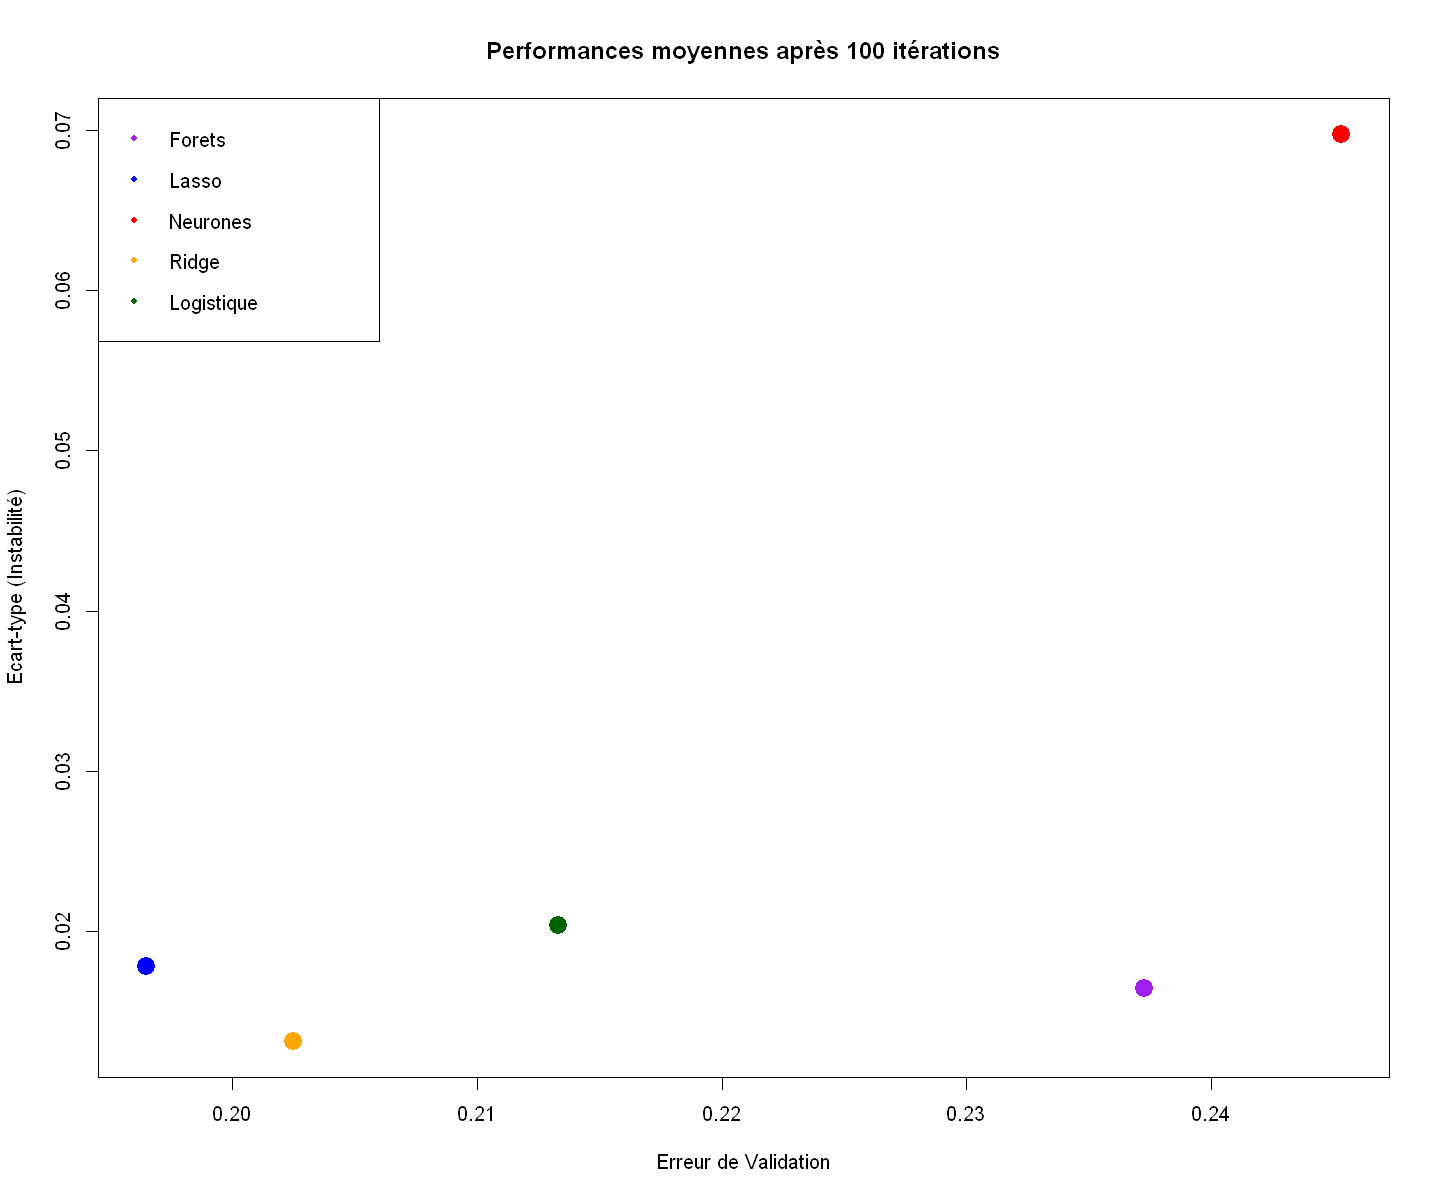

In [152]:
Precisions <- as.matrix(c(accuracy_forets,accuracy_lasso,accuracy_neurones,accuracy_ridge,accuracy_RL))
SD <- as.matrix(c(SD_forets,SD_lasso,SD_neurones,SD_ridge,SD_RL))
Modeles <- as.matrix(c("Forets", "Lasso","Neurones", "Ridge", "Logistique"))
plot_final <- cbind(Precisions,SD)
plot_question5 <- cbind(plot_final,Modeles)
colnames(plot_question5) <- c("Erreur de Validation", "Ecart-type (Instabilité)", "Modeles")
plot_question5 <- as.data.frame(plot_question5)
plot_question5$Modeles <- as.factor(plot_question5$Modeles)

plot(plot_question5$`Erreur de Validation`,plot_question5$`Ecart-type (Instabilité)` , 
     pch = 20, cex=3, col=c('purple', 'blue', "red", "orange", "darkgreen"),
     xlab = "Erreur de Validation" , ylab = "Ecart-type (Instabilité)", main = "Performances moyennes après 100 itérations")
legend("topleft", legend = c("Forets", "Lasso","Neurones", "Ridge", "Logistique"),
       col =c('purple', 'blue', "red", "orange", "darkgreen"),pch=20,cex=1)

##### Les deux régressions pénalisées performent mieux, il faut cependant garder en tête que les dimensions ne sont pas les mêmes pour tous les modèles.

##### Il est difficile de juger les réseaux de neurones comme étant "mauvais", ils sont censés très bien performés dans le cas de très hauts volumes de données, or ici on a volontairement réduit les dimensions. On ne peut pas non plus être certain que deux couches cachées 5 et 2 soient  les paramètres irréfutables pour la performance, on pourrait essayer de paramétrer les bonnes dimensions et les bonnes couches pour améliorer les performances.  Egalement, la grande volatilté des réseaux de neurones s'explique par les dimensions réduites.

##### Les forets, semble souffrir d'un manque de précision. Mais il faut garder à l'esprit que c'est le seul modèle qui n'a pas eu le droit à une réduction de dimensionnalité, ce qui relativise la "mauvaise" performance.

##### Toujours est-il que dans le cas d'une nécessité de prédiction pour la variable "réponse", la régression lasso serait à retenir.

### Question 6

Call: survfit(formula = Surv(delai, etat) ~ 1, data = y)

       n events median 0.95LCL 0.95UCL
[1,] 128     80   7.79    6.53    9.79

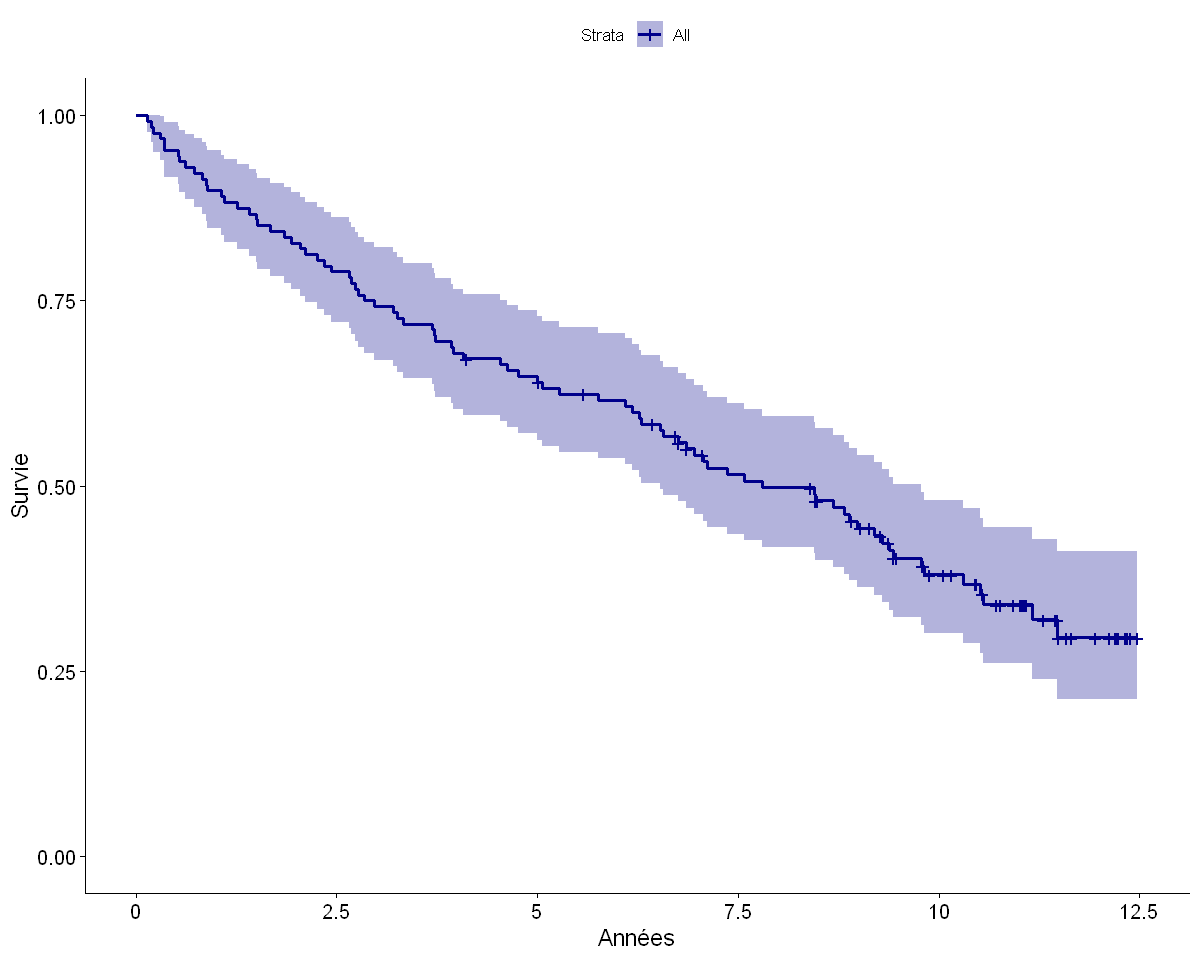

In [117]:
#Pour une meilleur visibilité, conversion du temps en années.
y$delai <- y$delai / 365.25
ggsurvplot(
  fit = survfit(Surv(delai, etat) ~ 1, data = y),
  xlab = "Années",
  ylab = "Survie",
  palette = 'darkblue')
fit = survfit(Surv(delai, etat) ~ 1, data = y)
fit

##### Le temps médian est de 7.79 années, soit 7 an, 9 mois, 2 semaines.

##### Pour l'étude du RMST, il y a beaucoup plus d'intérêt à le comparer en fonction d'un critère. Le RMST sur l'ensemble des 128 patients, sans comparaison, est moins informatif.

##### On peut par exemple comparer les RMST par rapport au sex des patients :

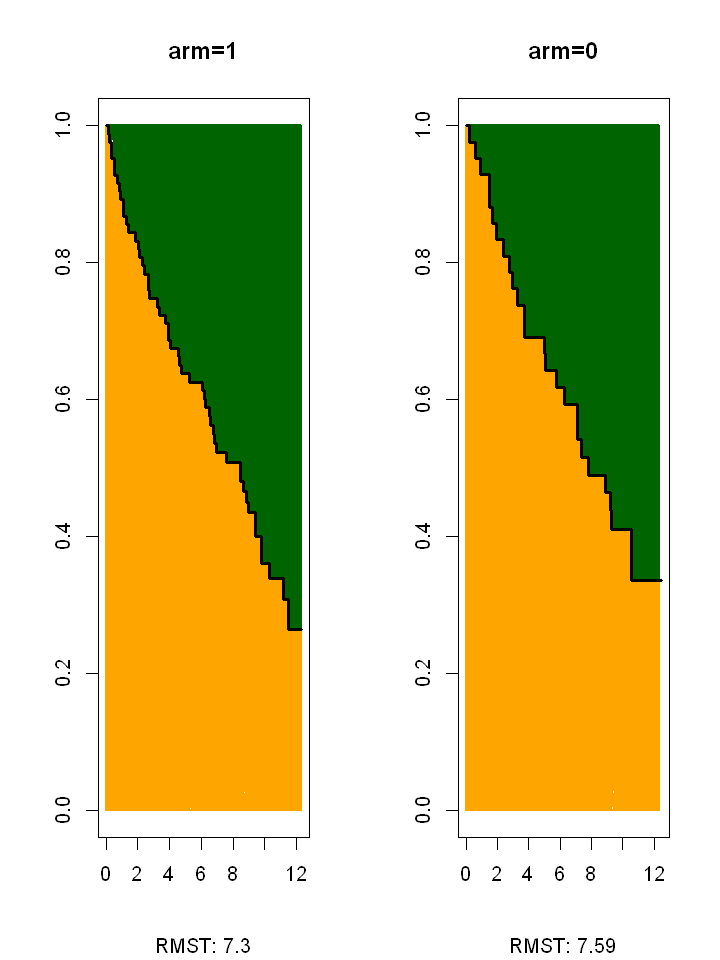

In [134]:
y_bis <- y
y_bis <- y_bis[-c(128,95,45),] #suppression des NA
y_bis$sex <- recode(y_bis$sex, "F" = 0, "M" = 1)

options(repr.plot.width=6, repr.plot.height=8)
RMST2 <- rmst2(time = y_bis$delai, status = y_bis$etat, arm = y_bis$sex)
plot(RMST2, col = "black", col.RMST = "orange", col.RMTL ="darkgreen")

##### Pour cette pathologie hématologique, dans cette étude on mesure que les hommes ont une survie plus faible que les femmes.

In [ ]:
### Question 7

In [135]:
cox <- coxph(Surv(delai, etat) ~ biol, data=y)

In [137]:
summary(cox)

Call:
coxph(formula = Surv(delai, etat) ~ biol, data = y)

  n= 128, number of events= 80 

        coef exp(coef) se(coef)     z Pr(>|z|)    
biol 0.15365   1.16608  0.01962 7.831 4.84e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     exp(coef) exp(-coef) lower .95 upper .95
biol     1.166     0.8576     1.122     1.212

Concordance= 0.755  (se = 0.026 )
Likelihood ratio test= 44.52  on 1 df,   p=3e-11
Wald test            = 61.32  on 1 df,   p=5e-15
Score (logrank) test = 85.3  on 1 df,   p=<2e-16


##### Après inspection du summary cox ;
##### Statistique rapport de Vraisemblance ; 44.52
##### Test de Wald                         ; 61.32
##### Test du score                        ; 85.3

In [ ]:
### Question 8

[1] 1.196959e-16

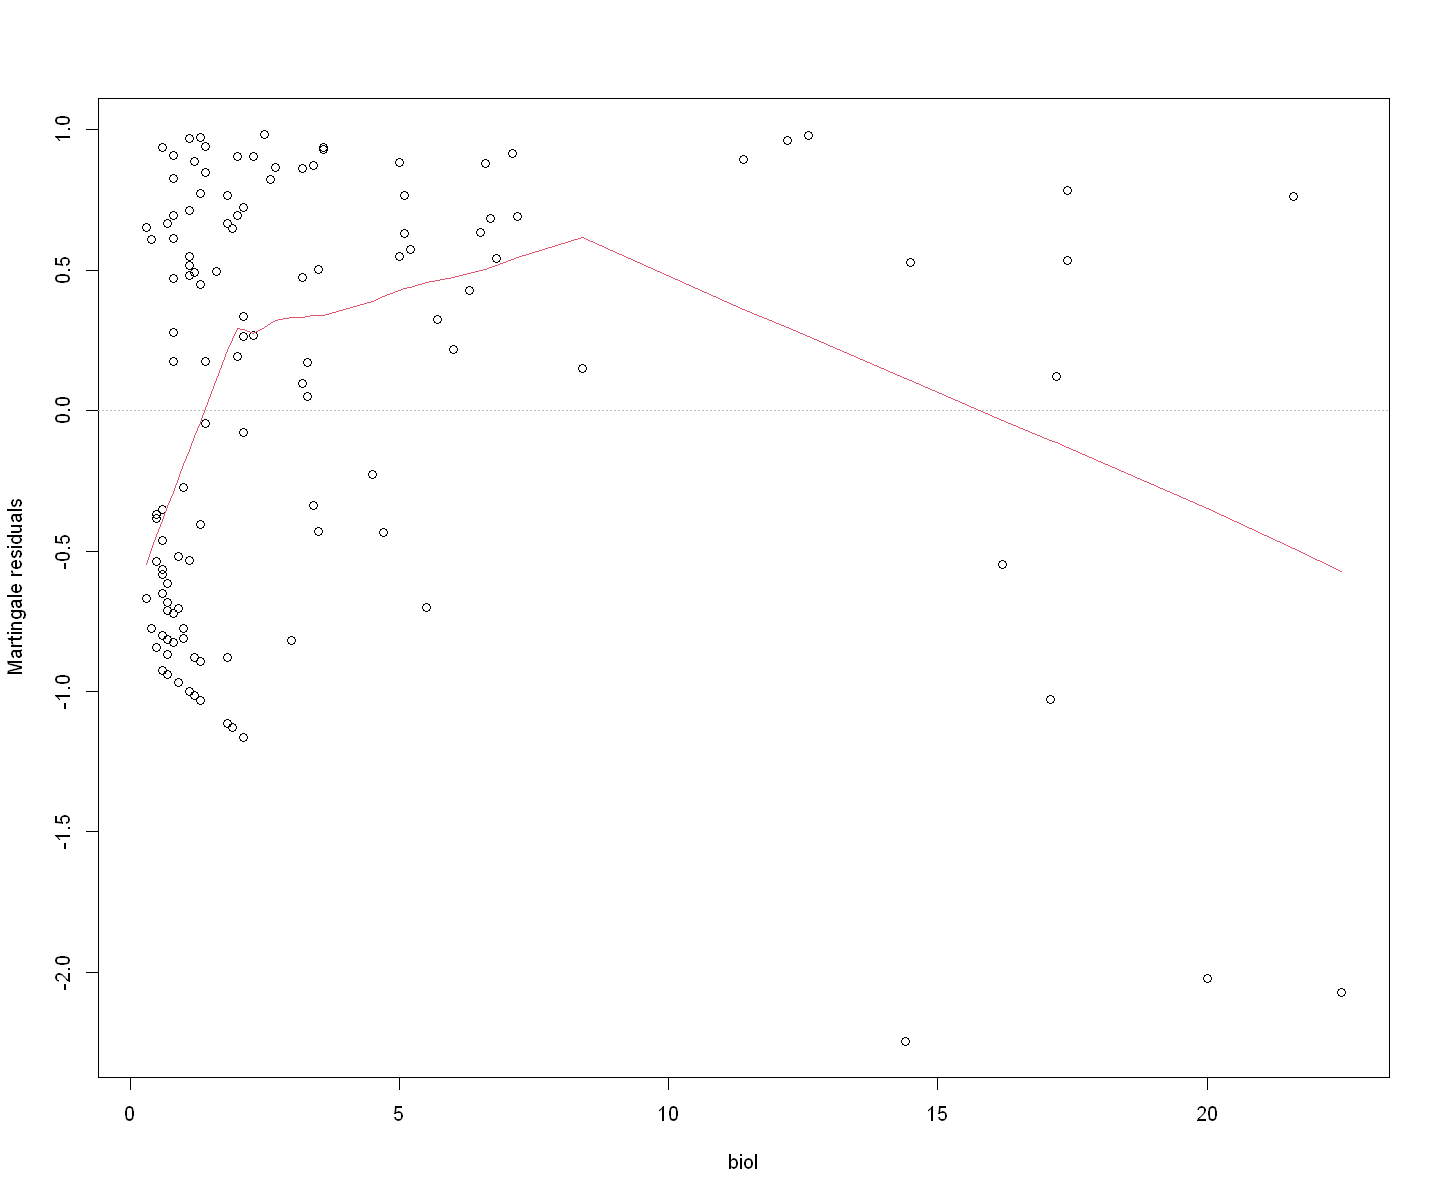

In [140]:
options(repr.plot.width=12, repr.plot.height=10)
cox.resid(cox)
mean(residuals(cox, type = "martingale"))

##### La moyenne des résidus est = à 1.19e-16 donc ~ 0. On a une distribution asymétrique.

##### On voudrait idéalement une smooth curve suivant l'axe y=0. On peut essayer une log transformation, puis une box cox si la courbe observée n'est pas suffisamment log linéaire en y=0.

##### Log transformation, réinjection et plot nouveau plot résiduel ;

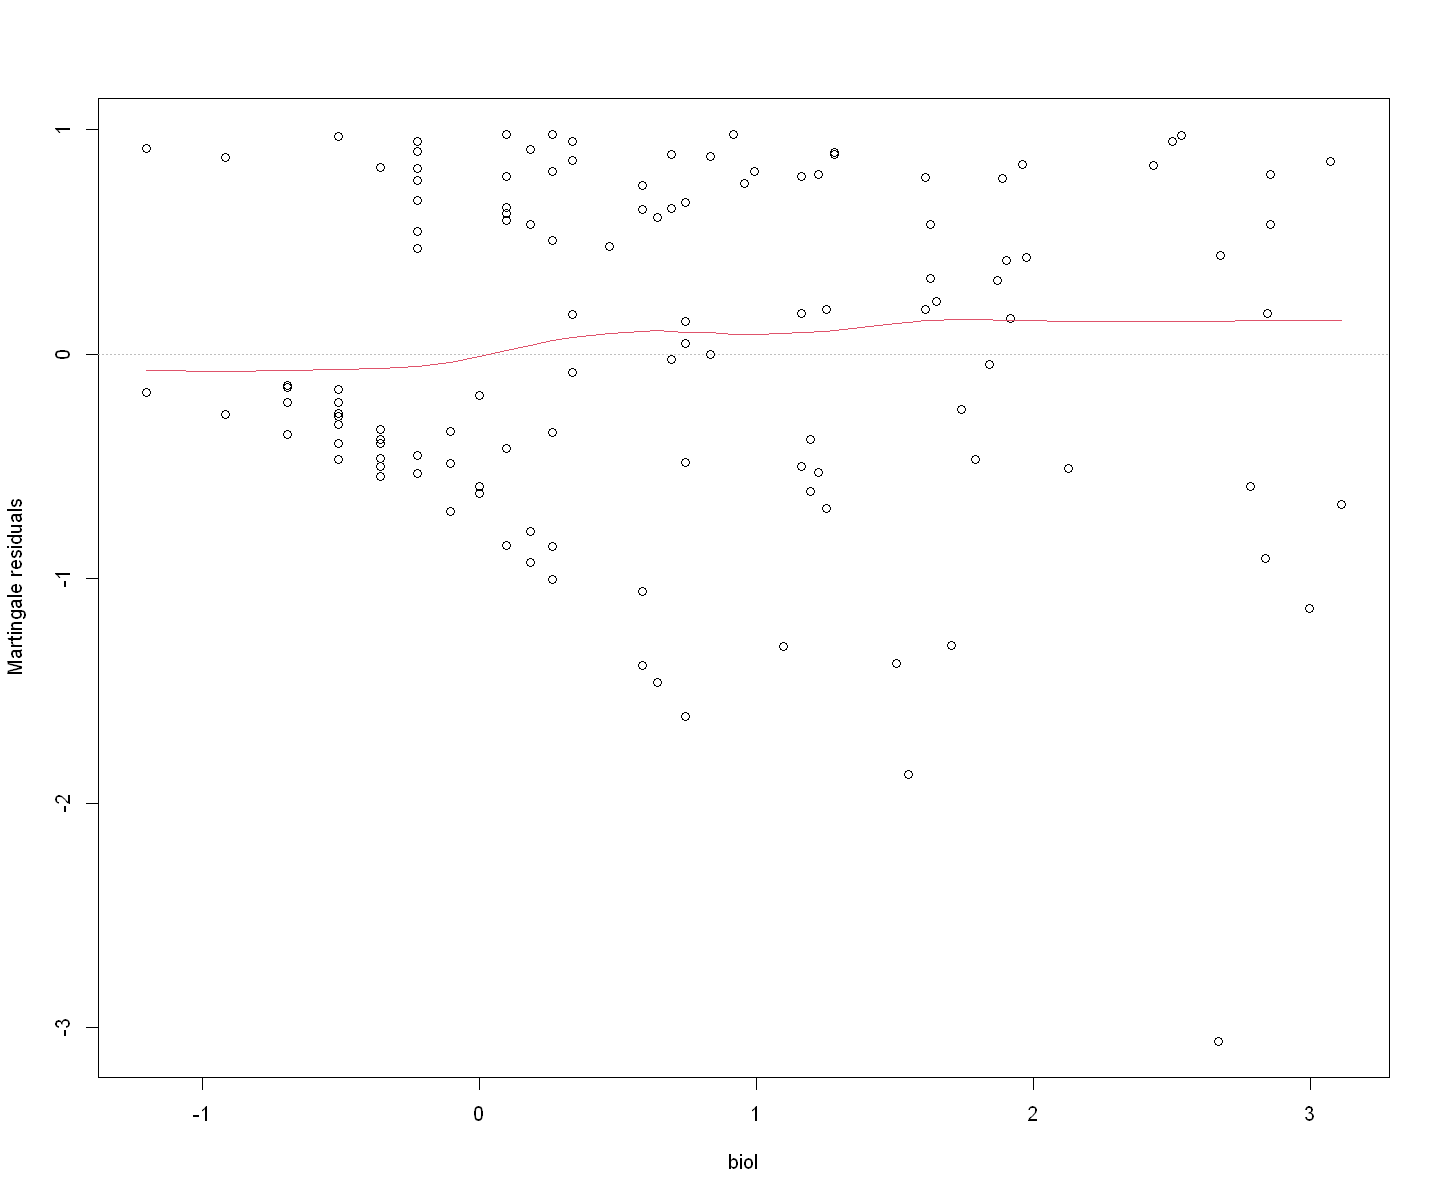

In [141]:
y2 <- y
y2$biol <- log(y2$biol)
cox_log <- coxph(Surv(delai, etat) ~ biol, data=y2, x=TRUE, y=TRUE)
cox.resid(cox_log)

##### On peut s'estimer satisfait et considérer que cette transformation est suffisante, pas besoin de box-cox. La courbe est suffisamment acceptable.

##### On doit tester l'hypothèse des hasards non proportionnels maintenant.

### Résidus Schoenfeld :

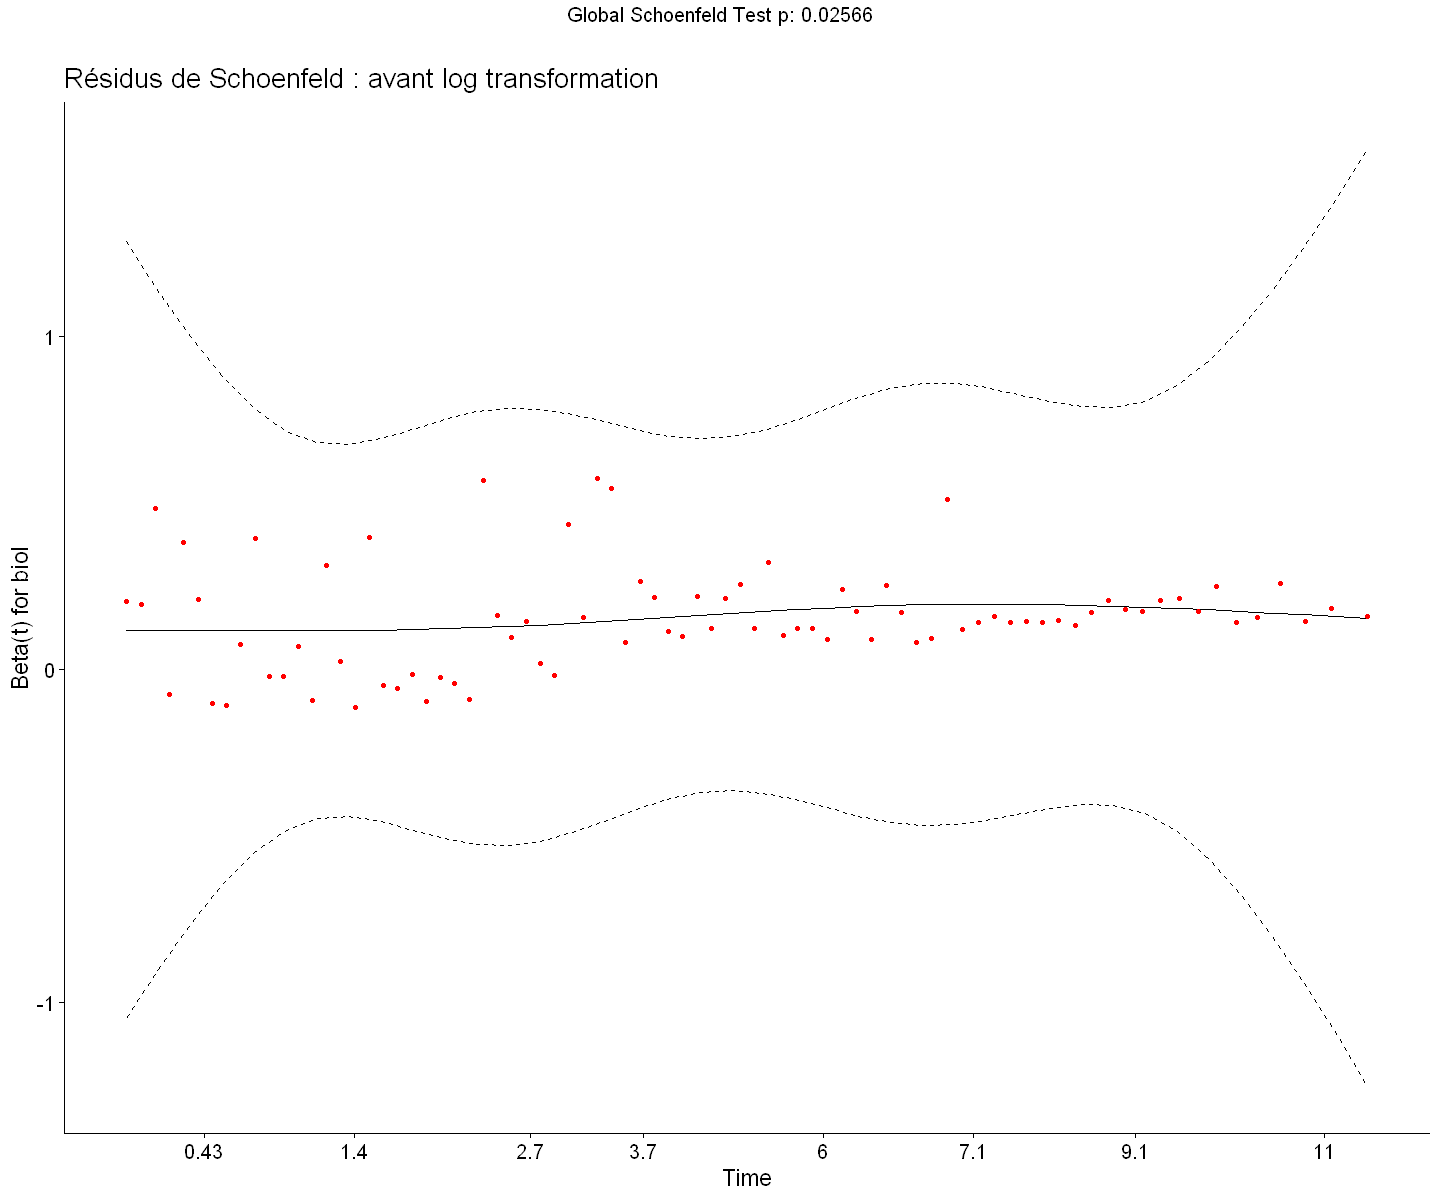

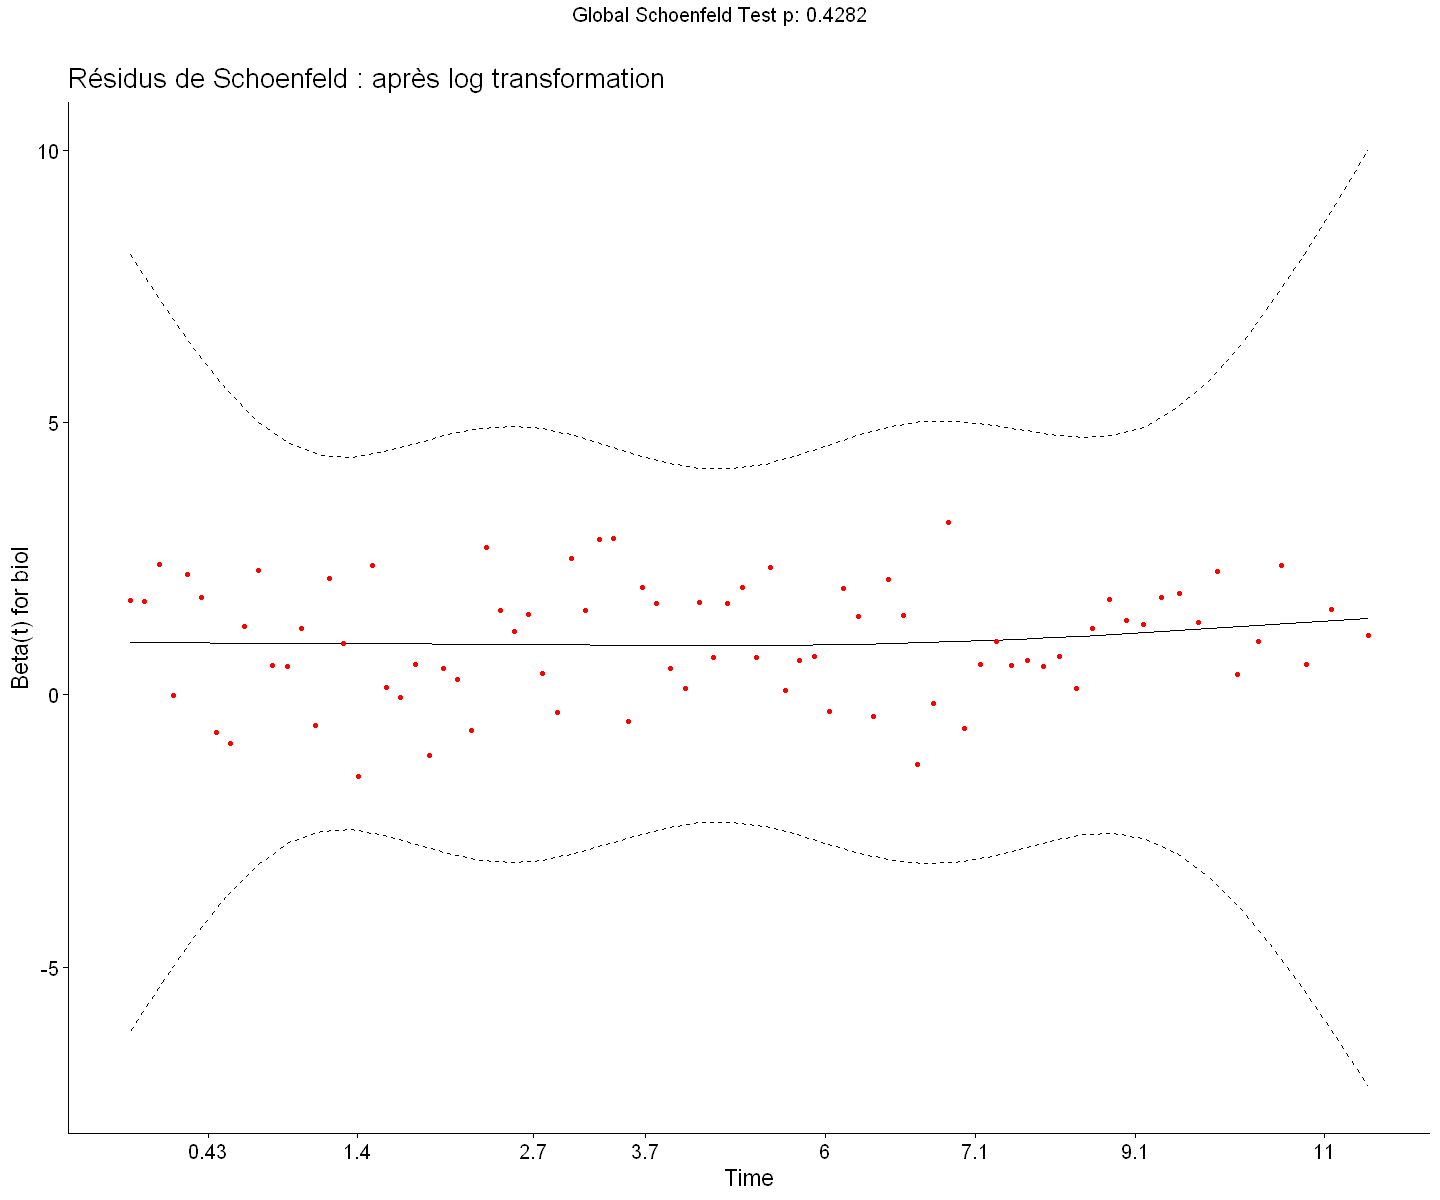

In [142]:
#Pour l'analyse résiduelle de Schoenfeld avant et après transformation,
#on utilisera cox.zph AVEC ggcoxzph du package survminer, pour à la fois avoir
#le résultat du test de schoenfeld et les graphiques.

ggcoxzph(cox.zph(cox), main = "Résidus de Schoenfeld : avant log transformation")
ggcoxzph(cox.zph(cox_log), main = "Résidus de Schoenfeld : après log transformation")

##### Avant transformation, on a presque une linéarité pas très éloignée de y=0, mais l'écart à la proportionnalité est significatif ; p-value = 0.02566

##### Après log transformation, la linéarité est plus prononcée, pas strictement en 0, mais très proche. L'hypothèse des hasards non proportionnels est rejeté avec une p-value de 0.4282.

##### Conclusion ; On peut s'estimer satisfait du modèle de Cox dans notre cas, et on peut considérer que changer de modèle, ou effectuer un long travail de modifications, n'est pas une nécessité.

### Question 9

In [144]:
#La log transformation a été effectuée à la question précédente.
#Prédiction de la survie attribuée aux individus à t=4 ans, avec biol 0 (Marqueur biologique absent) et biol 1;

predict(cox_log, newdata=list(delai=4,etat=1, biol=0), type ="survival")
predict(cox_log, newdata=list(delai=4,etat=1, biol=1), type ="survival")

[1] 0.8605653

[1] 0.6678353

### Verdict ;
##### A 4 ans, la survie prédite d'un individu biol=0 est de 0.8605 (86,06%). 
##### La survie prédite d'un individu biol=1 est de 0.6678 (66,78%).